In [68]:
import pandas as np
import pandahouse as ph
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy import stats
import seaborn as sns

In [2]:
connection = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'simulator',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [52]:
query = '''
select post_id,
       countIf(action = 'view') AS views,
       countIf(action = 'like') as likes,
max(time) - min(time) as lifetime
from {db}.feed_actions 
group by post_id
limit 10000
'''

In [53]:
df = ph.read_clickhouse(query, connection=connection)
df

,post_id,views,likes,lifetime
0,0,213,15,111941
1,610,362,44,64220
2,948,61,3,16530
3,774,1368,159,103656
4,462,3546,605,201204
...,...,...,...,...
2675,2462,1083,112,69233
2676,2298,3180,421,132396
2677,2120,2239,263,91275
2678,2688,4121,604,88468


In [54]:
# вычисляем ctr поста
df['ctr'] = df.likes / df.views * 100

In [58]:
# правильно ли выглядят наши данные
df.head()

,post_id,views,likes,lifetime,ctr
0,0,213,15,111941,7.042254
1,610,362,44,64220,12.154696
2,948,61,3,16530,4.918033
3,774,1368,159,103656,11.622807
4,462,3546,605,201204,17.061478


Смотрю корреляцию между данными, как они ведут себя и зависят друг от друга

In [56]:
df.corr()

,post_id,views,likes,lifetime,ctr
post_id,1.000000,0.167398,0.138082,-0.086112,0.047386
views,0.167398,1.000000,0.990071,0.846585,0.681569
likes,0.138082,0.990071,1.000000,0.799011,0.647513
lifetime,-0.086112,0.846585,0.799011,1.000000,0.745877
ctr,0.047386,0.681569,0.647513,0.745877,1.000000


In [62]:
df.lifetime.mean()/60/60/24

1.5735305028676063

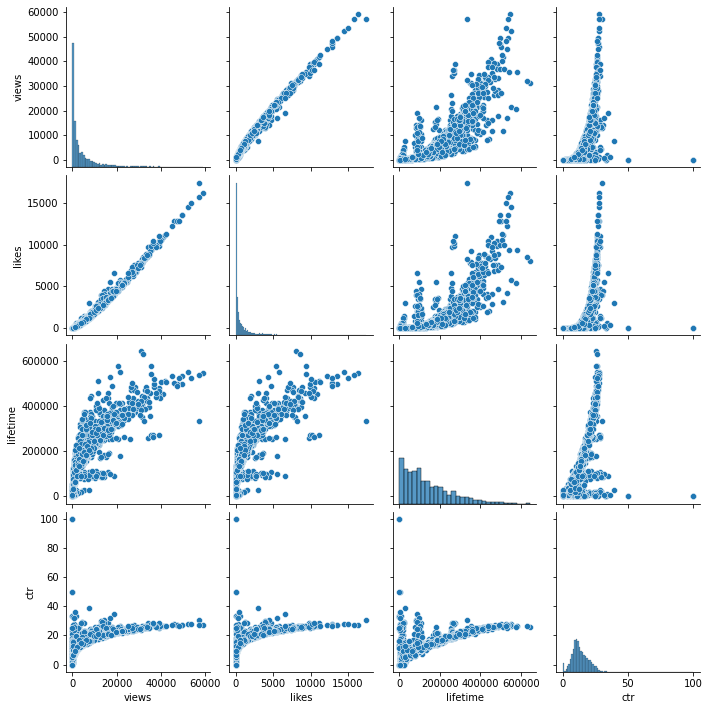

In [74]:
 sns.pairplot(df.drop('post_id', axis=1))